<a href="https://colab.research.google.com/github/ZandomeneghiChiara/F1_Project/blob/main/F1_Project_Prog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Formula 1 World Championship**

Dataset from https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020?select=results.csv

Formula 1, also known as F1 or Formula One, represents the pinnacle of single-seater auto racing, governed by the Fédération Internationale de l'Automobile (FIA) and owned by the Formula One Group. Since its inaugural season in 1950, the FIA Formula One World Championship has been a premier global motorsport competition. The term "formula" refers to the set of stringent rules and regulations to which all participants' cars must adhere. Each Formula One season comprises a series of races called Grands Prix, held on purpose-built circuits and public road courses around the world.

1. Identification Information
- resultId: Unique identifier for the race result entry.
- raceId: Unique identifier for the race.
- driverId: Unique identifier for the driver.
- constructorId: Unique identifier for the constructor/team.
2. Driver and Constructor Information
- number: The race number of the driver for that event.
3. Starting and Finishing Positions
- grid: Starting position of the driver on the grid.
- position: Finishing position of the driver in the race.
- positionText: Textual representation of the finishing position (e.g., "1", "DNF").
- positionOrder: Numerical order of finishing positions.
4. Performance Metrics
- points: The points awarded to the driver for this race.
- laps: Number of laps completed by the driver.
- time: Total time taken to complete the race.
- milliseconds: Total race time in milliseconds.
- fastestLap: Lap number on which the driver set their fastest lap.
- rank: Rank of the fastest lap within the race.
- fastestLapTime: Time of the driver’s fastest lap.
- fastestLapSpeed: Average speed during the driver’s fastest lap.
5. Race Status
- statusId: Unique identifier indicating the race status (e.g., finished, retired, disqualified).

Each of these categories gives a different perspective on the race results:
- *Identification Information*: Helps in uniquely identifying and linking specific results to races, drivers, and constructors.
- *Driver and Constructor Information*: Provides details about who was driving and for which team.
- *Starting and Finishing Positions*: Offers insight into the driver's starting position and their performance in terms of final position.
- *Performance Metrics*: Detailed performance data, including points scored, lap times, and speeds, which are crucial for performance analysis.
- *Race Status*: Indicates the outcome or status of the driver in the race, whether they finished, retired, or were disqualified.

In [1]:
# import libraries
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None

# 1 - Explore the dataset

In [2]:
re_df = pd.read_csv('results.csv')
re_df

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26075,26081,1110,817,213,3,19,16,16,16,0.0,44,+1:43.071,5053521,25,15,1:50.994,227.169,1
26076,26082,1110,858,3,2,18,17,17,17,0.0,44,+1:44.476,5054926,37,9,1:50.486,228.213,1
26077,26083,1110,807,210,27,0,18,18,18,0.0,44,+1:50.450,5060900,26,4,1:49.907,229.415,1
26078,26084,1110,832,6,55,4,\N,R,19,0.0,23,\N,\N,9,19,1:53.138,222.864,130


In [3]:
ra_df = pd.read_csv('races.csv')
ra_df

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,1116,2023,18,69,United States Grand Prix,2023-10-22,19:00:00,https://en.wikipedia.org/wiki/2023_United_Stat...,2023-10-20,17:30:00,2023-10-21,18:00:00,\N,\N,2023-10-20,21:00:00,2023-10-21,22:00:00
1097,1117,2023,19,32,Mexico City Grand Prix,2023-10-29,20:00:00,https://en.wikipedia.org/wiki/2023_Mexico_City...,2023-10-27,18:30:00,2023-10-27,22:00:00,2023-10-28,17:30:00,2023-10-28,21:00:00,\N,\N
1098,1118,2023,20,18,São Paulo Grand Prix,2023-11-05,17:00:00,https://en.wikipedia.org/wiki/2023_S%C3%A3o_Pa...,2023-11-03,14:30:00,2023-11-04,14:30:00,\N,\N,2023-11-03,18:00:00,2023-11-04,18:30:00
1099,1119,2023,21,80,Las Vegas Grand Prix,2023-11-19,06:00:00,https://en.wikipedia.org/wiki/2023_Las_Vegas_G...,2023-11-17,04:30:00,2023-11-17,08:00:00,2023-11-18,04:30:00,2023-11-18,08:00:00,\N,\N


In [4]:
ra_df = ra_df[['raceId','year', 'name']]
ra_df = ra_df.rename(columns = {'name': 'PrixName'})
ra_df

,raceId,year,PrixName
0,1,2009,Australian Grand Prix
1,2,2009,Malaysian Grand Prix
2,3,2009,Chinese Grand Prix
3,4,2009,Bahrain Grand Prix
4,5,2009,Spanish Grand Prix
...,...,...,...
1096,1116,2023,United States Grand Prix
1097,1117,2023,Mexico City Grand Prix
1098,1118,2023,São Paulo Grand Prix
1099,1119,2023,Las Vegas Grand Prix


In [5]:
merged_df = pd. merge(re_df, ra_df, on='raceId')
merged_df

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,year,PrixName
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,2008,Australian Grand Prix
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1,2008,Australian Grand Prix
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1,2008,Australian Grand Prix
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1,2008,Australian Grand Prix
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1,2008,Australian Grand Prix
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26075,26081,1110,817,213,3,19,16,16,16,0.0,44,+1:43.071,5053521,25,15,1:50.994,227.169,1,2023,Belgian Grand Prix
26076,26082,1110,858,3,2,18,17,17,17,0.0,44,+1:44.476,5054926,37,9,1:50.486,228.213,1,2023,Belgian Grand Prix
26077,26083,1110,807,210,27,0,18,18,18,0.0,44,+1:50.450,5060900,26,4,1:49.907,229.415,1,2023,Belgian Grand Prix
26078,26084,1110,832,6,55,4,\N,R,19,0.0,23,\N,\N,9,19,1:53.138,222.864,130,2023,Belgian Grand Prix


In [6]:
co_df = pd.read_csv('constructors.csv')
co_df

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso
...,...,...,...,...,...
206,209,manor,Manor Marussia,British,http://en.wikipedia.org/wiki/Manor_Motorsport
207,210,haas,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team
208,211,racing_point,Racing Point,British,http://en.wikipedia.org/wiki/Racing_Point_F1_Team
209,213,alphatauri,AlphaTauri,Italian,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri


In [7]:
co_df = co_df[['constructorId','name']]
co_df = co_df.rename(columns = {'name': 'ConstructorName'})
co_df

,constructorId,ConstructorName
0,1,McLaren
1,2,BMW Sauber
2,3,Williams
3,4,Renault
4,5,Toro Rosso
...,...,...
206,209,Manor Marussia
207,210,Haas F1 Team
208,211,Racing Point
209,213,AlphaTauri


In [8]:
merged_df = pd. merge(merged_df, co_df, on='constructorId')
merged_df

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,year,PrixName,ConstructorName
0,1,18,1,1,22,1,1,1,1,10.0,...,1:34:50.616,5690616,39,2,1:27.452,218.300,1,2008,Australian Grand Prix,McLaren
1,5,18,5,1,23,3,5,5,5,4.0,...,+18.014,5708630,43,1,1:27.418,218.385,1,2008,Australian Grand Prix,McLaren
2,25,19,5,1,23,8,3,3,3,6.0,...,+38.450,5517005,19,7,1:35.922,208.031,1,2008,Malaysian Grand Prix,McLaren
3,27,19,1,1,22,9,5,5,5,4.0,...,+46.548,5525103,53,3,1:35.462,209.033,1,2008,Malaysian Grand Prix,McLaren
4,49,20,5,1,23,5,5,5,5,4.0,...,+26.789,5493759,49,1,1:33.193,209.062,1,2008,Bahrain Grand Prix,McLaren
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26075,26045,1108,839,214,31,13,\N,R,20,0.0,...,\N,\N,4,20,1:33.941,225.754,44,2023,British Grand Prix,Alpine F1 Team
26076,26064,1109,839,214,31,12,\N,R,19,0.0,...,\N,\N,\N,0,\N,\N,130,2023,Hungarian Grand Prix,Alpine F1 Team
26077,26065,1109,842,214,10,15,\N,R,20,0.0,...,\N,\N,\N,0,\N,\N,130,2023,Hungarian Grand Prix,Alpine F1 Team
26078,26073,1110,839,214,31,14,8,8,8,4.0,...,+1:14.719,5025169,27,8,1:50.439,228.310,1,2023,Belgian Grand Prix,Alpine F1 Team


In [9]:
dr_df = pd.read_csv('drivers.csv')
dr_df

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...,...,...,...,...,...
852,854,mick_schumacher,47,MSC,Mick,Schumacher,1999-03-22,German,http://en.wikipedia.org/wiki/Mick_Schumacher
853,855,zhou,24,ZHO,Guanyu,Zhou,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Zhou_Guanyu
854,856,de_vries,21,DEV,Nyck,de Vries,1995-02-06,Dutch,http://en.wikipedia.org/wiki/Nyck_de_Vries
855,857,piastri,81,PIA,Oscar,Piastri,2001-04-06,Australian,http://en.wikipedia.org/wiki/Oscar_Piastri


In [10]:
dr_df = dr_df[['driverId','surname']]
dr_df

,driverId,surname
0,1,Hamilton
1,2,Heidfeld
2,3,Rosberg
3,4,Alonso
4,5,Kovalainen
...,...,...
852,854,Schumacher
853,855,Zhou
854,856,de Vries
855,857,Piastri


In [11]:
dr_df = dr_df[['driverId','surname']]
dr_df = dr_df.rename(columns = {'surname': 'DriverSurname'})
dr_df

,driverId,DriverSurname
0,1,Hamilton
1,2,Heidfeld
2,3,Rosberg
3,4,Alonso
4,5,Kovalainen
...,...,...
852,854,Schumacher
853,855,Zhou
854,856,de Vries
855,857,Piastri


In [12]:
merged_df = pd. merge(merged_df, dr_df, on='driverId')
merged_df

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,year,PrixName,ConstructorName,DriverSurname
0,1,18,1,1,22,1,1,1,1,10.0,...,5690616,39,2,1:27.452,218.300,1,2008,Australian Grand Prix,McLaren,Hamilton
1,27,19,1,1,22,9,5,5,5,4.0,...,5525103,53,3,1:35.462,209.033,1,2008,Malaysian Grand Prix,McLaren,Hamilton
2,57,20,1,1,22,3,13,13,13,0.0,...,\N,25,19,1:35.520,203.969,11,2008,Bahrain Grand Prix,McLaren,Hamilton
3,69,21,1,1,22,5,3,3,3,6.0,...,5903238,20,3,1:22.017,204.323,1,2008,Spanish Grand Prix,McLaren,Hamilton
4,90,22,1,1,22,3,2,2,2,8.0,...,5213230,31,2,1:26.529,222.085,1,2008,Turkish Grand Prix,McLaren,Hamilton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26075,25999,1106,852,213,22,19,14,14,14,0.0,...,5711771,68,14,1:16.666,204.779,1,2023,Canadian Grand Prix,AlphaTauri,Tsunoda
26076,26024,1107,852,213,22,16,19,19,19,0.0,...,\N,37,19,1:10.176,221.511,11,2023,Austrian Grand Prix,AlphaTauri,Tsunoda
26077,26041,1108,852,213,22,16,16,16,16,0.0,...,5148163,48,17,1:32.084,230.307,1,2023,British Grand Prix,AlphaTauri,Tsunoda
26078,26060,1109,852,213,22,17,15,15,15,0.0,...,\N,68,10,1:23.269,189.405,11,2023,Hungarian Grand Prix,AlphaTauri,Tsunoda


In [13]:
df = merged_df

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26080 entries, 0 to 26079
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         26080 non-null  int64  
 1   raceId           26080 non-null  int64  
 2   driverId         26080 non-null  int64  
 3   constructorId    26080 non-null  int64  
 4   number           26080 non-null  object 
 5   grid             26080 non-null  int64  
 6   position         26080 non-null  object 
 7   positionText     26080 non-null  object 
 8   positionOrder    26080 non-null  int64  
 9   points           26080 non-null  float64
 10  laps             26080 non-null  int64  
 11  time             26080 non-null  object 
 12  milliseconds     26080 non-null  object 
 13  fastestLap       26080 non-null  object 
 14  rank             26080 non-null  object 
 15  fastestLapTime   26080 non-null  object 
 16  fastestLapSpeed  26080 non-null  object 
 17  statusId    

In [15]:
df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,year,PrixName,ConstructorName,DriverSurname
0,1,18,1,1,22,1,1,1,1,10.0,...,5690616,39,2,1:27.452,218.300,1,2008,Australian Grand Prix,McLaren,Hamilton
1,27,19,1,1,22,9,5,5,5,4.0,...,5525103,53,3,1:35.462,209.033,1,2008,Malaysian Grand Prix,McLaren,Hamilton
2,57,20,1,1,22,3,13,13,13,0.0,...,\N,25,19,1:35.520,203.969,11,2008,Bahrain Grand Prix,McLaren,Hamilton
3,69,21,1,1,22,5,3,3,3,6.0,...,5903238,20,3,1:22.017,204.323,1,2008,Spanish Grand Prix,McLaren,Hamilton
4,90,22,1,1,22,3,2,2,2,8.0,...,5213230,31,2,1:26.529,222.085,1,2008,Turkish Grand Prix,McLaren,Hamilton


In [16]:
df.tail()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,year,PrixName,ConstructorName,DriverSurname
26075,25999,1106,852,213,22,19,14,14,14,0.0,...,5711771,68,14,1:16.666,204.779,1,2023,Canadian Grand Prix,AlphaTauri,Tsunoda
26076,26024,1107,852,213,22,16,19,19,19,0.0,...,\N,37,19,1:10.176,221.511,11,2023,Austrian Grand Prix,AlphaTauri,Tsunoda
26077,26041,1108,852,213,22,16,16,16,16,0.0,...,5148163,48,17,1:32.084,230.307,1,2023,British Grand Prix,AlphaTauri,Tsunoda
26078,26060,1109,852,213,22,17,15,15,15,0.0,...,\N,68,10,1:23.269,189.405,11,2023,Hungarian Grand Prix,AlphaTauri,Tsunoda
26079,26075,1110,852,213,22,11,10,10,10,1.0,...,5030671,26,17,1:51.394,226.353,1,2023,Belgian Grand Prix,AlphaTauri,Tsunoda


In [17]:
df.describe()

,resultId,raceId,driverId,constructorId,grid,positionOrder,points,laps,statusId,year
count,26080.000000,26080.000000,26080.000000,26080.000000,26080.000000,26080.000000,26080.000000,26080.000000,26080.000000,26080.000000
mean,13041.372661,536.695667,266.277569,49.059663,11.167561,12.854141,1.906635,46.076687,17.476074,1990.553144
std,7530.008377,303.034639,272.581622,60.221056,7.232797,7.700068,4.219715,29.726058,26.129965,19.508665
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1950.000000
25%,6520.750000,294.750000,57.000000,6.000000,5.000000,6.000000,0.000000,22.000000,1.000000,1976.000000
50%,13040.500000,519.000000,163.000000,25.000000,11.000000,12.000000,0.000000,53.000000,10.000000,1991.000000
75%,19560.250000,791.000000,364.000000,58.250000,17.000000,18.000000,2.000000,66.000000,14.000000,2007.000000
max,26085.000000,1110.000000,858.000000,214.000000,34.000000,39.000000,50.000000,200.000000,141.000000,2023.000000


In [18]:
df.shape

(26080, 22)

# 2 - Cleaning up the dataset

In [19]:
# List of features to analyze
features = ['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
    'position', 'positionText', 'positionOrder', 'points', 'laps', 'time',
    'milliseconds', 'fastestLap', 'rank', 'fastestLapTime', 'fastestLapSpeed',
    'statusId']

In [20]:
resultId_counts = df['resultId'].value_counts()
print("\nresultId counts:")
print(resultId_counts)


resultId counts:
resultId
1        1
2247     1
2466     1
2443     1
2431     1
        ..
10120    1
10103    1
10070    1
10046    1
26075    1
Name: count, Length: 26080, dtype: int64


In [21]:
raceId_counts = df['raceId'].value_counts()
print("\nraceId counts:")
print(raceId_counts)


raceId counts:
raceId
800    55
809    47
361    39
365    39
368    39
       ..
668    14
470    14
827    13
660    13
765    10
Name: count, Length: 1091, dtype: int64


In [22]:
driverId_counts = df['driverId'].value_counts()
print("\ndriverId counts:")
print(driverId_counts)


driverId counts:
driverId
4      370
8      352
22     326
1      322
18     309
      ... 
499      1
598      1
443      1
614      1
452      1
Name: count, Length: 857, dtype: int64


In [23]:
constructorId_counts = df['constructorId'].value_counts()
print("\nconstructorId counts:")
print(constructorId_counts)


constructorId counts:
constructorId
6      2371
1      1855
3      1609
25      881
32      871
       ... 
160       1
69        1
137       1
178       1
91        1
Name: count, Length: 210, dtype: int64


In [24]:
number_counts = df['number'].value_counts()
print("\nnumber counts:")
print(number_counts)


number counts:
number
6      994
8      993
4      985
16     971
3      971
      ... 
85       1
112      1
86       1
84       1
90       1
Name: count, Length: 130, dtype: int64


In [25]:
grid_counts = df['grid'].value_counts()
print("\ngrid counts:")
print(grid_counts)


grid counts:
grid
0     1616
1     1102
7     1101
11    1098
5     1098
4     1098
9     1098
3     1096
10    1096
8     1095
12    1093
2     1092
6     1091
13    1091
14    1086
15    1079
16    1066
17    1055
18    1018
19    1001
20     957
21     697
22     656
23     453
24     429
25     301
26     248
27      46
28      30
29      25
30      19
31      18
32      17
33      13
34       1
Name: count, dtype: int64


In [26]:
position_counts = df['position'].value_counts()
print("\nposition counts:")
print(position_counts)


position counts:
position
\N    10873
3      1101
4      1101
2      1099
5      1097
1      1094
6      1090
7      1070
8      1042
9      1004
10      944
11      867
12      766
13      679
14      571
15      495
16      404
17      310
18      205
19      128
20       67
21       34
22       19
23        8
24        3
25        1
33        1
28        1
26        1
30        1
29        1
27        1
31        1
32        1
Name: count, dtype: int64


In [27]:
positionText_counts = df['positionText'].value_counts()
print("\npositionText counts:")
print(positionText_counts)


positionText counts:
positionText
R     8827
F     1368
3     1101
4     1101
2     1099
5     1097
1     1094
6     1090
7     1070
8     1042
9     1004
10     944
11     868
12     766
13     679
14     572
15     495
16     404
W      330
17     310
18     205
N      190
D      147
19     128
20      67
21      34
22      19
E        9
23       8
24       3
30       1
31       1
27       1
29       1
25       1
26       1
28       1
33       1
32       1
Name: count, dtype: int64


In [28]:
positionOrder_counts = df['positionOrder'].value_counts()
print("\npositionOrder counts:")
print(positionOrder_counts)


positionOrder counts:
positionOrder
4     1101
3     1101
2     1100
11    1099
6     1098
5     1098
8     1098
7     1098
9     1097
10    1096
12    1096
1     1094
13    1092
14    1088
15    1086
16    1073
17    1066
18    1051
19    1028
20    1013
21     745
22     716
23     505
24     478
25     386
26     349
27     270
28     221
29     180
30     156
31     117
32      79
33      65
34      46
35      29
36      18
37      17
38      17
39      13
Name: count, dtype: int64


In [29]:
points_counts = df['points'].value_counts()
print("\npoints counts:")
print(points_counts)


points counts:
points
0.00     18250
2.00      1091
4.00      1079
6.00      1060
1.00      1034
3.00       823
10.00      580
9.00       443
8.00       441
12.00      261
15.00      261
18.00      251
25.00      239
5.00       134
26.00       30
19.00       18
1.50        17
7.00        13
13.00        9
16.00        9
11.00        7
0.50         6
4.50         4
1.33         3
8.50         2
6.50         2
7.50         1
8.14         1
3.14         1
6.14         1
3.50         1
2.50         1
12.50        1
36.00        1
30.00        1
24.00        1
20.00        1
50.00        1
4.14         1
Name: count, dtype: int64


In [30]:
laps_counts = df['laps'].value_counts()
print("\nlaps counts:")
print(laps_counts)


laps counts:
laps
0      2509
70      953
53      905
52      788
56      751
       ... 
148       1
150       1
116       1
180       1
189       1
Name: count, Length: 172, dtype: int64


In [31]:
time_counts = df['time'].value_counts()
print("\ntime counts:")
print(time_counts)


time counts:
time
\N           18829
+8:22.19         5
+0.7             4
+5.7             4
+1:29.6          4
             ...  
+11.204          1
+1:30.764        1
+5.491           1
+57.749          1
+1:20.221        1
Name: count, Length: 7000, dtype: int64


In [32]:
milliseconds_counts = df['milliseconds'].value_counts()
print("\nmilliseconds counts:")
print(milliseconds_counts)


milliseconds counts:
milliseconds
\N          18830
14259460        5
10928200        3
4925000         2
14356700        2
            ...  
5613210         1
5707049         1
5596462         1
5285558         1
5030671         1
Name: count, Length: 7213, dtype: int64


In [33]:
fastestLap_counts = df['fastestLap'].value_counts()
print("\nfastestLap counts:")
print(fastestLap_counts)


fastestLap counts:
fastestLap
\N    18465
50      284
52      268
53      266
51      249
      ...  
77       12
78        6
73        5
80        3
85        2
Name: count, Length: 80, dtype: int64


In [34]:
rank_counts = df['rank'].value_counts()
print("\nrank counts:")
print(rank_counts)


rank counts:
rank
\N    18249
2       377
6       377
5       377
4       377
1       377
3       377
9       376
10      376
12      376
7       376
13      376
11      376
8       375
14      375
15      374
16      373
17      367
18      358
19      322
20      269
0       216
21      122
22       91
23       43
24       28
Name: count, dtype: int64


In [35]:
fastestLapTime_counts = df['fastestLapTime'].value_counts()
print("\nfastestLapTime counts:")
print(fastestLapTime_counts)


fastestLapTime counts:
fastestLapTime
\N          18465
1:18.904        4
1:43.026        4
1:18.262        4
1:17.495        4
            ...  
1:14.423        1
1:39.890        1
1:29.057        1
1:52.724        1
1:51.394        1
Name: count, Length: 6970, dtype: int64


In [36]:
fastestLapSpeed_counts = df['fastestLapSpeed'].value_counts()
print("\nfastestLapSpeed counts:")
print(fastestLapSpeed_counts)


fastestLapSpeed counts:
fastestLapSpeed
\N         18465
202.871        3
194.706        3
207.249        3
202.685        3
           ...  
203.234        1
196.499        1
206.388        1
181.122        1
226.353        1
Name: count, Length: 7145, dtype: int64


In [37]:
statusId_counts = df['statusId'].value_counts()
print("\nstatusId counts:")
print(statusId_counts)


statusId counts:
statusId
1      7246
11     3894
5      2016
12     1598
3      1048
       ... 
136       1
120       1
135       1
90        1
127       1
Name: count, Length: 137, dtype: int64


In [38]:
year_counts = df['year'].value_counts()
print("\nyear counts:")
print(year_counts)


year counts:
year
1989    620
1990    542
1991    539
1988    495
2012    480
       ... 
1951    179
1969    177
1957    171
1966    166
1950    160
Name: count, Length: 74, dtype: int64


In [39]:
PrixName_counts = df['PrixName'].value_counts()
print("\nPrixName counts:")
print(PrixName_counts)


PrixName counts:
PrixName
British Grand Prix               1853
Italian Grand Prix               1824
Monaco Grand Prix                1644
German Grand Prix                1599
Belgian Grand Prix               1577
French Grand Prix                1484
Canadian Grand Prix              1271
Spanish Grand Prix               1256
Brazilian Grand Prix             1163
United States Grand Prix         1009
Hungarian Grand Prix              891
Australian Grand Prix             870
Austrian Grand Prix               861
Japanese Grand Prix               842
Dutch Grand Prix                  727
San Marino Grand Prix             667
South African Grand Prix          581
European Grand Prix               528
Mexican Grand Prix                478
Portuguese Grand Prix             453
Argentine Grand Prix              448
Malaysian Grand Prix              412
Indianapolis 500                  405
Bahrain Grand Prix                400
Chinese Grand Prix                342
Abu Dhabi Grand Prix   

In [40]:
ConstructorName_counts = df['ConstructorName'].value_counts()
print("\nConstructorName counts:")
print(ConstructorName_counts)


ConstructorName counts:
ConstructorName
Ferrari              2371
McLaren              1855
Williams             1609
Tyrrell               881
Team Lotus            871
                     ... 
Wetteroth               1
McGuire                 1
Arzani-Volpini          1
Cooper-Alfa Romeo       1
Shannon                 1
Name: count, Length: 210, dtype: int64


In [41]:
DriverSurname_counts = df['DriverSurname'].value_counts()
print("\nDriverSurname counts:")
print(DriverSurname_counts)


DriverSurname counts:
DriverSurname
Schumacher    532
Alonso        370
Hill          353
Räikkönen     352
Rosberg       334
             ... 
Cade            1
de Dryver       1
Kavanagh        1
Taramazzo       1
Heyer           1
Name: count, Length: 798, dtype: int64


# 3 - Handle Outliers, Missing Values and Drop Columns

In [42]:
# Identify missing values
# Convert '\N' to NaN in specified columns
columns_to_convert = ['resultId', 'raceId', 'driverId', 'constructorId',
                      'number', 'grid', 'position', 'positionText', 'positionOrder',
                      'points', 'laps', 'time', 'milliseconds', 'fastestLap',
                      'rank', 'fastestLapTime', 'fastestLapSpeed', 'statusId']
df[columns_to_convert] = df[columns_to_convert].replace('\\N', np.nan)
missing_values = df.isna().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 resultId               0
raceId                 0
driverId               0
constructorId          0
number                 6
grid                   0
position           10873
positionText           0
positionOrder          0
points                 0
laps                   0
time               18829
milliseconds       18830
fastestLap         18465
rank               18249
fastestLapTime     18465
fastestLapSpeed    18465
statusId               0
year                   0
PrixName               0
ConstructorName        0
DriverSurname          0
dtype: int64


In [43]:
# drop the columns that I'm interested for my analysis

df.drop(['resultId', 'driverId', 'constructorId', 'number', 'position',
         'positionText', 'time', 'milliseconds', 'fastestLap',
          'rank', 'fastestLapTime', 'fastestLapSpeed'],
          axis=1, inplace = True)
print(df.columns)
print(df.shape)
print(df.describe())

Index(['raceId', 'grid', 'positionOrder', 'points', 'laps', 'statusId', 'year',
       'PrixName', 'ConstructorName', 'DriverSurname'],
      dtype='object')
(26080, 10)
             raceId          grid  positionOrder        points          laps  \
count  26080.000000  26080.000000   26080.000000  26080.000000  26080.000000   
mean     536.695667     11.167561      12.854141      1.906635     46.076687   
std      303.034639      7.232797       7.700068      4.219715     29.726058   
min        1.000000      0.000000       1.000000      0.000000      0.000000   
25%      294.750000      5.000000       6.000000      0.000000     22.000000   
50%      519.000000     11.000000      12.000000      0.000000     53.000000   
75%      791.000000     17.000000      18.000000      2.000000     66.000000   
max     1110.000000     34.000000      39.000000     50.000000    200.000000   

           statusId          year  
count  26080.000000  26080.000000  
mean      17.476074   1990.553144  
s

In [51]:
# Manage the Outliers

# Drop columns with any missing values
df_clean = df.dropna(axis=1)

# Function to remove outliers using IQR method

# Remove outliers
df_clean = df[['raceId','grid', 'positionOrder', 'points', 'laps', 'statusId',
               'year','PrixName', 'DriverSurname','ConstructorName']]

# Verify the remaining data
print("Data after removing outliers:")
print(df_clean.shape)

Data after removing outliers:
(26080, 10)


In [52]:
df_clean.head()

,raceId,grid,positionOrder,points,laps,statusId,year,PrixName,DriverSurname,ConstructorName
0,18,1,1,10.0,58,1,2008,Australian Grand Prix,Hamilton,McLaren
1,19,9,5,4.0,56,1,2008,Malaysian Grand Prix,Hamilton,McLaren
2,20,3,13,0.0,56,11,2008,Bahrain Grand Prix,Hamilton,McLaren
3,21,5,3,6.0,66,1,2008,Spanish Grand Prix,Hamilton,McLaren
4,22,3,2,8.0,58,1,2008,Turkish Grand Prix,Hamilton,McLaren


In [46]:
df_clean.tail()

,grid,positionOrder,points,laps,statusId,year,PrixName,DriverSurname,ConstructorName
26075,19,14,0.0,70,1,2023,Canadian Grand Prix,Tsunoda,AlphaTauri
26076,16,19,0.0,70,11,2023,Austrian Grand Prix,Tsunoda,AlphaTauri
26077,16,16,0.0,52,1,2023,British Grand Prix,Tsunoda,AlphaTauri
26078,17,15,0.0,69,11,2023,Hungarian Grand Prix,Tsunoda,AlphaTauri
26079,11,10,1.0,44,1,2023,Belgian Grand Prix,Tsunoda,AlphaTauri


In [47]:
df_clean

,grid,positionOrder,points,laps,statusId,year,PrixName,DriverSurname,ConstructorName
0,1,1,10.0,58,1,2008,Australian Grand Prix,Hamilton,McLaren
1,9,5,4.0,56,1,2008,Malaysian Grand Prix,Hamilton,McLaren
2,3,13,0.0,56,11,2008,Bahrain Grand Prix,Hamilton,McLaren
3,5,3,6.0,66,1,2008,Spanish Grand Prix,Hamilton,McLaren
4,3,2,8.0,58,1,2008,Turkish Grand Prix,Hamilton,McLaren
...,...,...,...,...,...,...,...,...,...
26075,19,14,0.0,70,1,2023,Canadian Grand Prix,Tsunoda,AlphaTauri
26076,16,19,0.0,70,11,2023,Austrian Grand Prix,Tsunoda,AlphaTauri
26077,16,16,0.0,52,1,2023,British Grand Prix,Tsunoda,AlphaTauri
26078,17,15,0.0,69,11,2023,Hungarian Grand Prix,Tsunoda,AlphaTauri


In [48]:
df_clean.isnull().sum()

grid               0
positionOrder      0
points             0
laps               0
statusId           0
year               0
PrixName           0
DriverSurname      0
ConstructorName    0
dtype: int64

# 4 - Plots


In [147]:
# Filter data for the years 2020 to 2023
df_filtered = df[(df['year'] >= 2020) & (df['year'] <= 2022)]
df_filtered

,raceId,grid,positionOrder,points,laps,statusId,year,PrixName,ConstructorName,DriverSurname
247,1031,5,4,12.0,71,1,2020,Austrian Grand Prix,Mercedes,Hamilton
251,1032,1,1,25.0,71,1,2020,Styrian Grand Prix,Mercedes,Hamilton
252,1033,1,1,26.0,70,1,2020,Hungarian Grand Prix,Mercedes,Hamilton
253,1034,1,1,25.0,52,1,2020,British Grand Prix,Mercedes,Hamilton
254,1035,2,2,19.0,52,1,2020,70th Anniversary Grand Prix,Mercedes,Hamilton
...,...,...,...,...,...,...,...,...,...,...
26063,1092,13,13,0.0,28,1,2022,Japanese Grand Prix,AlphaTauri,Tsunoda
26064,1093,19,10,1.0,56,1,2022,United States Grand Prix,AlphaTauri,Tsunoda
26065,1094,13,20,0.0,50,130,2022,Mexico City Grand Prix,AlphaTauri,Tsunoda
26066,1095,0,17,0.0,70,11,2022,Brazilian Grand Prix,AlphaTauri,Tsunoda


In [148]:
raceId_f_counts = df_filtered['raceId'].value_counts()
print("\nraceId_f counts:")
print(raceId_f_counts.shape)  # 61


raceId_f counts:
(61,)


In [149]:
grid_f_counts = df_filtered['grid'].value_counts()
print("\ngrid_f counts:")
print(grid_f_counts.shape)      # 21


grid_f counts:
(21,)


In [150]:
positionOrder_f_counts = df_filtered['positionOrder'].value_counts()
print("\npositionOrder_f counts:")
print(positionOrder_f_counts.shape)   # 20


positionOrder_f counts:
(20,)


In [151]:
PrixName_f_counts = df_filtered['PrixName'].value_counts()
print("\nPrixName_f counts:")
print(PrixName_f_counts.shape)   # 32


PrixName_f counts:
(32,)


In [152]:
ConstructorName_f_counts = df_filtered['ConstructorName'].value_counts()
print("\nConstructorName_f counts:")
print(ConstructorName_f_counts)   # 12


ConstructorName_f counts:
ConstructorName
Mercedes          122
Alfa Romeo        122
Red Bull          122
Haas F1 Team      122
McLaren           122
Ferrari           122
Williams          122
AlphaTauri        122
Alpine F1 Team     88
Aston Martin       88
Racing Point       34
Renault            34
Name: count, dtype: int64


In [153]:
DriverSurname_f_counts = df_filtered['DriverSurname'].value_counts()
print("\nDriverSurname_f counts:")
print(DriverSurname_f_counts.shape)   # 30


DriverSurname_f counts:
(30,)


I want analyse this data for the Year 2022

In [154]:
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

## 4.1 - Race wons by Constructor

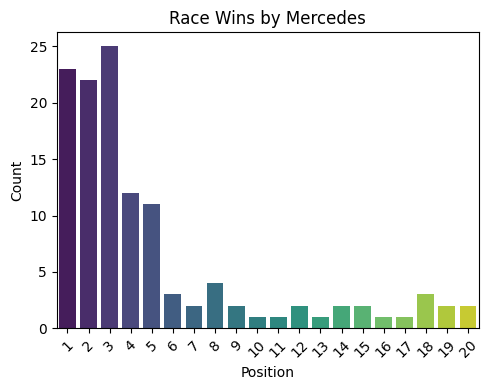

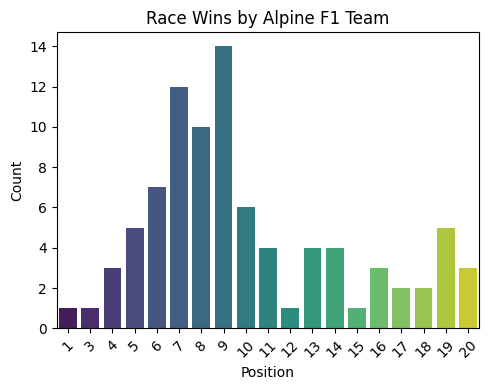

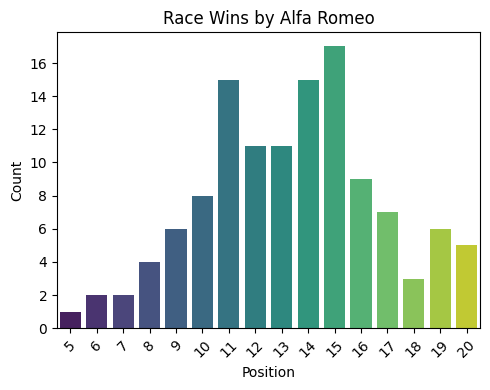

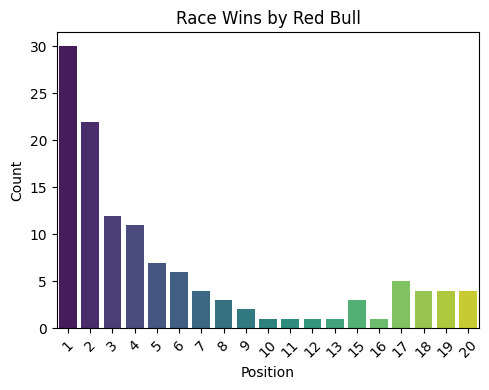

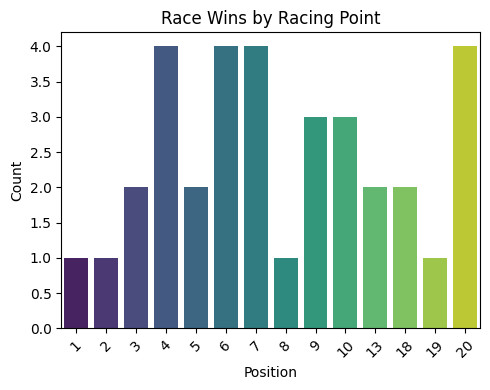

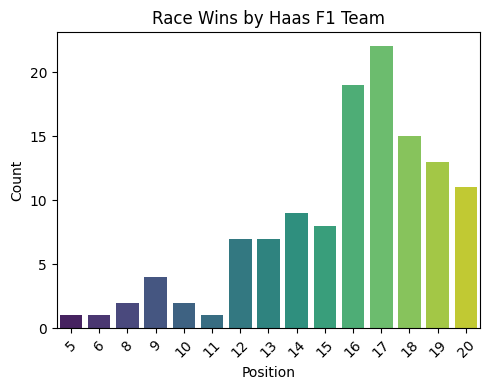

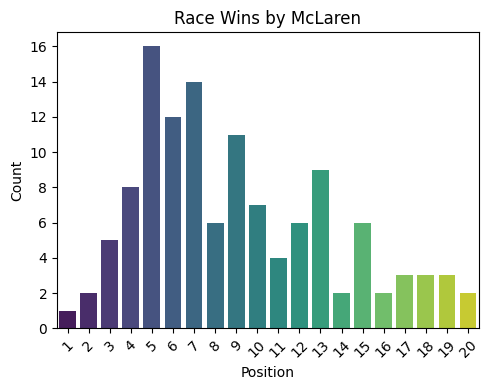

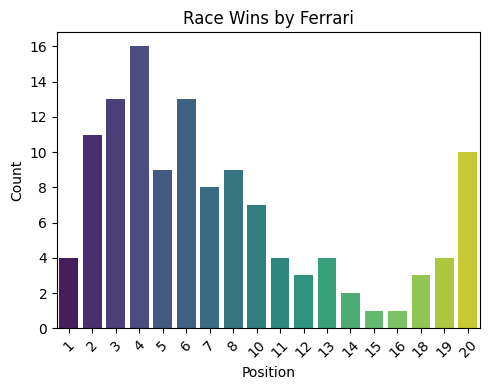

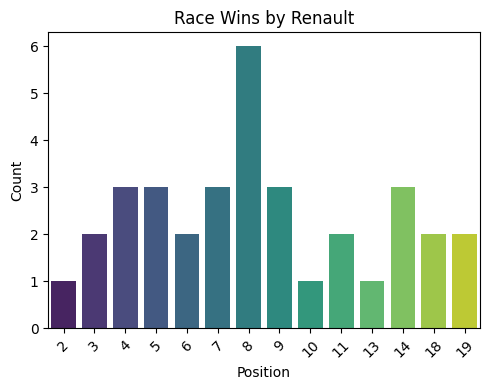

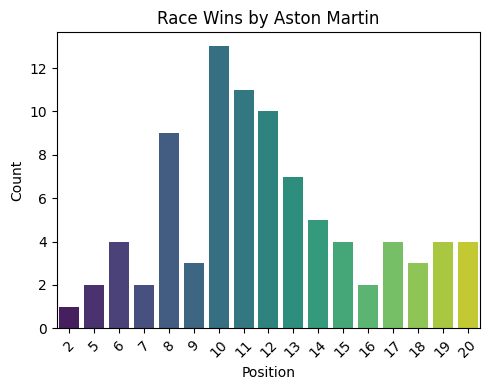

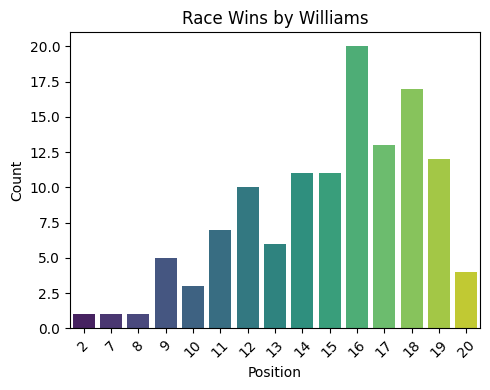

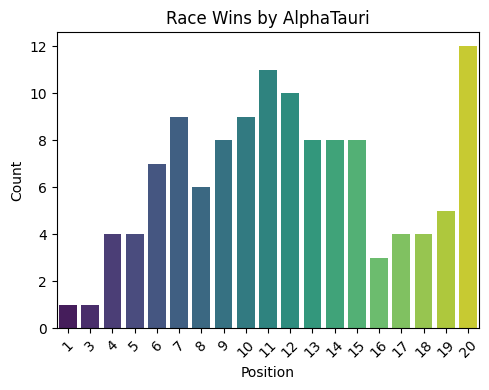

In [159]:
# 1. Race Wins for each Constructors
# List of unique constructors in the dataset
constructors = df_filtered['ConstructorName'].unique()

# Loop through each constructor and create a count plot
for constructor in constructors:
    plt.figure(figsize=(5, 4))
    sns.countplot(data=df_filtered[df_filtered['ConstructorName'] == constructor],
                  x='positionOrder', palette='viridis')
    plt.title(f'Race Wins by {constructor}')
    plt.xlabel('Position')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

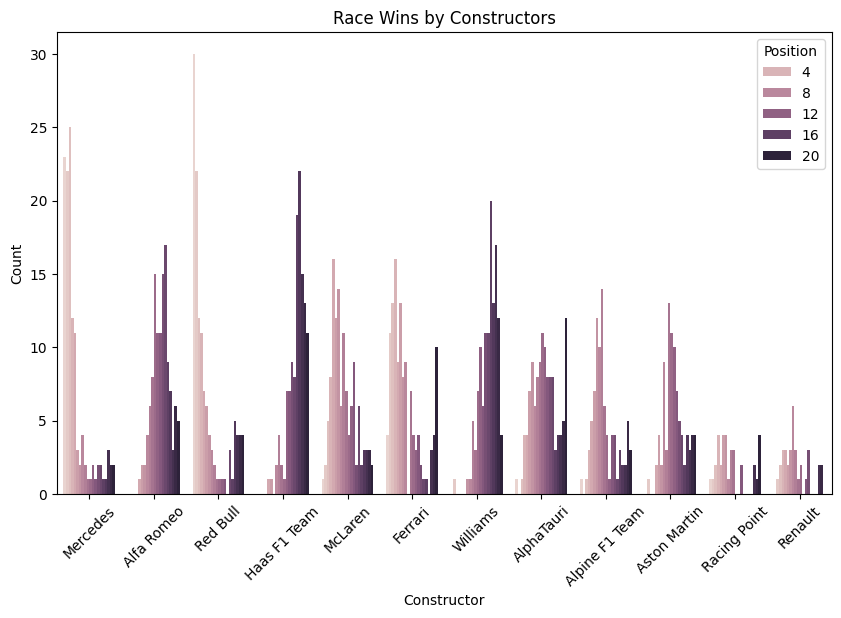

In [161]:
# 2. Race Wins by Constructors

plt.figure(figsize=(10, 6))
sns.countplot(data=df_filtered, x='ConstructorName', hue='positionOrder',
              order=df_filtered['ConstructorName'].value_counts().index[:12])
plt.title('Race Wins by Constructors')
plt.xlabel('Constructor')
plt.ylabel('Count')
plt.legend(title='Position')
plt.xticks(rotation=45)
plt.show()

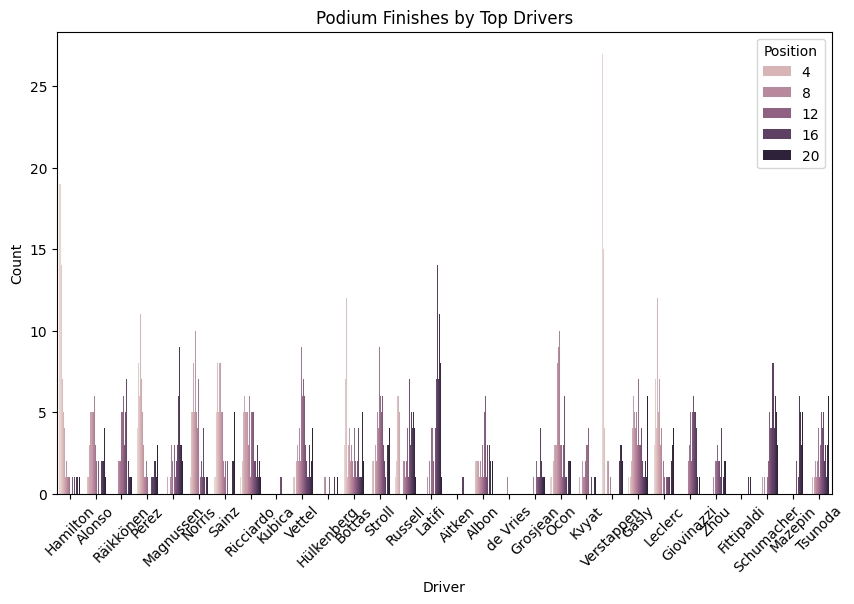

In [158]:
# 4. Podium Finishes by Drivers

top_drivers = df_filtered['DriverSurname'].value_counts().index[:30]
plt.figure(figsize=(10, 6))
sns.countplot(data=df_filtered[df_filtered['DriverSurname'].isin(top_drivers)], x='DriverSurname', hue='positionOrder')
plt.title('Podium Finishes by Top Drivers')
plt.xlabel('Driver')
plt.ylabel('Count')
plt.legend(title='Position')
plt.xticks(rotation=45)
plt.show()